<a href="https://colab.research.google.com/github/vjbarayuga/Week6-Regression_Models/blob/main/BostonDecisionTree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# mount google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import numpy as np
import matplotlib.pyplot as plt 

import pandas as pd  
import seaborn as sns 

%matplotlib inline

from numpy import nan
from numpy import isnan

#pipeline
from sklearn.pipeline import make_pipeline
from sklearn.compose import make_column_transformer
from sklearn.compose import ColumnTransformer

#for missing value and feature engineering
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import KBinsDiscretizer, OneHotEncoder

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestClassifier

In [4]:
# open filename
filename = '/content/drive/MyDrive/Coding_DOJO-Data_Science_Bootcamp/03_Machine_Learning_Data_Science/Datasets/Boston_Housing_from_Sklearn.csv'
boston = pd.read_csv(filename)
boston.head()


,CRIM,NOX,RM,AGE,PTRATIO,LSTAT,PRICE
0,0.00632,0.538,6.575,65.2,15.3,4.98,24.0
1,0.02731,0.469,6.421,78.9,17.8,9.14,21.6
2,0.02729,0.469,7.185,61.1,17.8,4.03,34.7
3,0.03237,0.458,6.998,45.8,18.7,2.94,33.4
4,0.06905,0.458,7.147,54.2,18.7,5.33,36.2


In [5]:
# check for missing values in all the columns
boston.isnull().sum()

CRIM       0
NOX        0
RM         0
AGE        0
PTRATIO    0
LSTAT      0
PRICE      0
dtype: int64

In [8]:
boston.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    object 
 1   NOX      506 non-null    float64
 2   RM       506 non-null    float64
 3   AGE      506 non-null    float64
 4   PTRATIO  506 non-null    float64
 5   LSTAT    506 non-null    float64
 6   PRICE    506 non-null    float64
dtypes: float64(6), object(1)
memory usage: 27.8+ KB


In [7]:
boston['CRIM']=boston['CRIM'].astype(object)

In [9]:
boston.columns

Index(['CRIM', 'NOX', 'RM', 'AGE', 'PTRATIO', 'LSTAT', 'PRICE'], dtype='object')

In [11]:
boston[['CRIM', 'NOX', 'RM', 'AGE', 'PTRATIO', 'LSTAT', 'PRICE']] = boston[['CRIM', 'NOX', 'RM', 'AGE', 'PTRATIO', 'LSTAT', 'PRICE']].fillna((boston[['CRIM', 'NOX', 'RM', 'AGE', 'PTRATIO', 'LSTAT', 'PRICE']].mean()))

In [15]:
X=boston.iloc[:,0:-1]
y=boston.iloc[:,-1]

In [13]:
X.head()

,CRIM,NOX,RM,AGE,PTRATIO,LSTAT
0,0.00632,0.538,6.575,65.2,15.3,4.98
1,0.02731,0.469,6.421,78.9,17.8,9.14
2,0.02729,0.469,7.185,61.1,17.8,4.03
3,0.03237,0.458,6.998,45.8,18.7,2.94
4,0.06905,0.458,7.147,54.2,18.7,5.33


In [16]:
y.head()

0    24.0
1    21.6
2    34.7
3    33.4
4    36.2
Name: PRICE, dtype: float64

In [17]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [19]:
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor(max_depth=6)
DT_reg=regressor.fit(X_train, y_train)
DT_reg

DecisionTreeRegressor(max_depth=6)

In [20]:
print(DT_reg.score(X_train,y_train))
print(DT_reg.score(X_test,y_test))

0.9496836391296106
0.5666298085023709


In [21]:
y_pred=DT_reg.predict(X_test)

In [22]:
y_pred

array([23.86923077, 14.5       , 22.62352941, 13.27142857, 20.22258065,
       20.22258065, 20.22258065, 20.22258065, 19.96875   , 20.22258065,
        8.345     , 17.55      , 13.27142857,  8.345     , 48.5       ,
       32.97777778, 20.22258065, 32.97777778, 27.8       , 20.22258065,
       23.86923077, 19.96875   , 20.22258065, 23.86923077, 19.96875   ,
       14.5       , 20.22258065, 16.575     , 40.75      , 19.45      ,
       13.27142857, 20.22258065, 20.22258065, 24.95555556, 22.62352941,
       20.22258065,  8.345     , 20.22258065, 13.27142857, 17.55      ,
       24.95555556, 19.96875   , 24.95555556, 13.27142857, 22.62352941,
       22.62352941, 19.63333333, 16.575     , 15.56842105, 25.        ,
       16.575     , 19.45      , 19.96875   , 35.2       , 16.575     ,
       19.63333333, 22.32727273, 20.22258065, 10.9       , 19.63333333,
       23.86923077, 24.95555556, 32.97777778, 27.8       , 20.22258065,
       27.8       , 16.575     , 22.36      , 16.13333333, 19.96

In [23]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

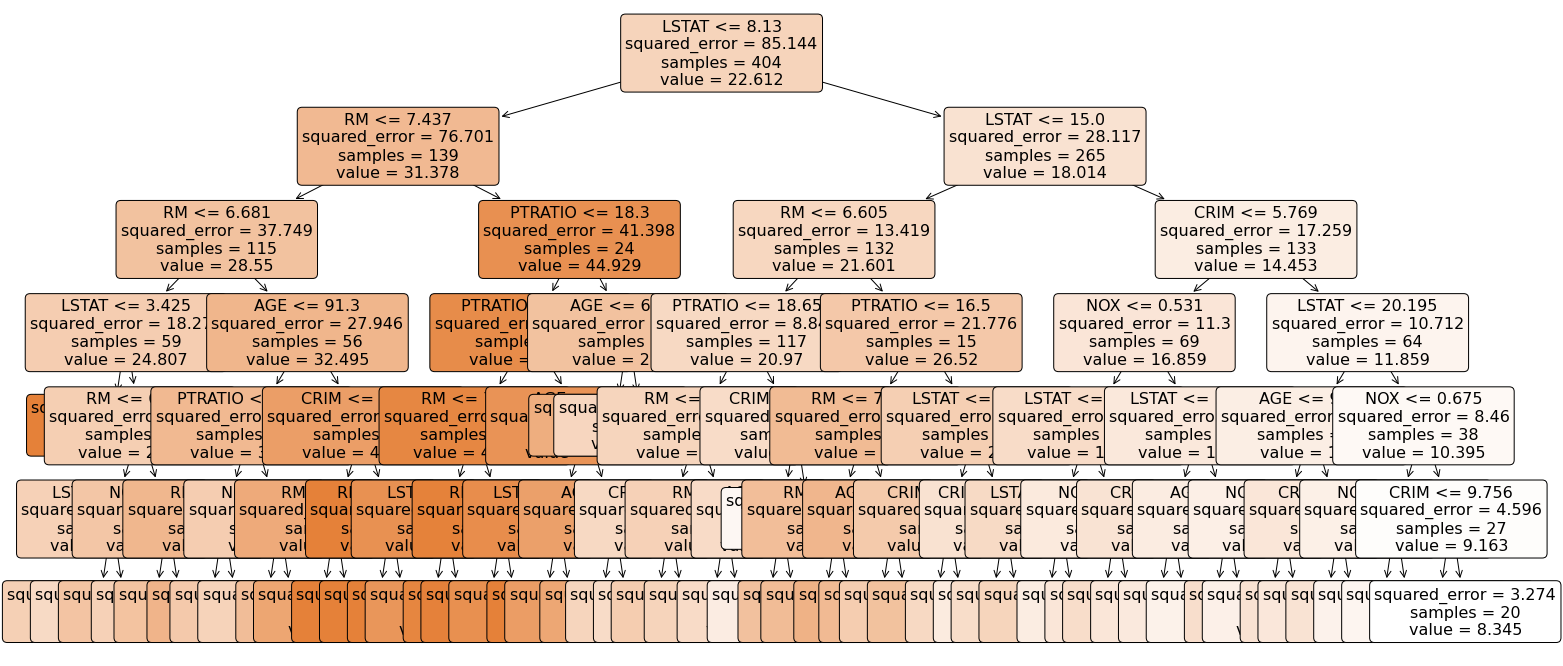

In [27]:
plt.figure(figsize=(25,12))
a = plot_tree(regressor, 
              feature_names=X.columns, 
              class_names=y, 
              filled=True, 
              rounded=True, 
              fontsize=16)

In [29]:
# model

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

lin_model = LinearRegression()
lin_model.fit(X_train, y_train)

LinearRegression()

In [30]:
# model evaluation for training set

y_train_predict = lin_model.predict(X_train)
r2 = r2_score(y_train, y_train_predict)

print("MODEL PERFORMANCE TRAIN PREDICT")
print("--------------------------------------")
print('R2 score is {}'.format(r2))
print("\n")

MODEL PERFORMANCE TRAIN PREDICT
--------------------------------------
R2 score is 0.7305266817826959


